#### Importing all the required librarires

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


##### Data imputation of 0's in every feature
##### Size of data

In [8]:
data.shape

(768, 9)

##### Target Column: Outcome[0,1](Binary Classification Task]
##### As the target column is available in dataset, supervised machine learning algorithm.
##### Records:768

In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


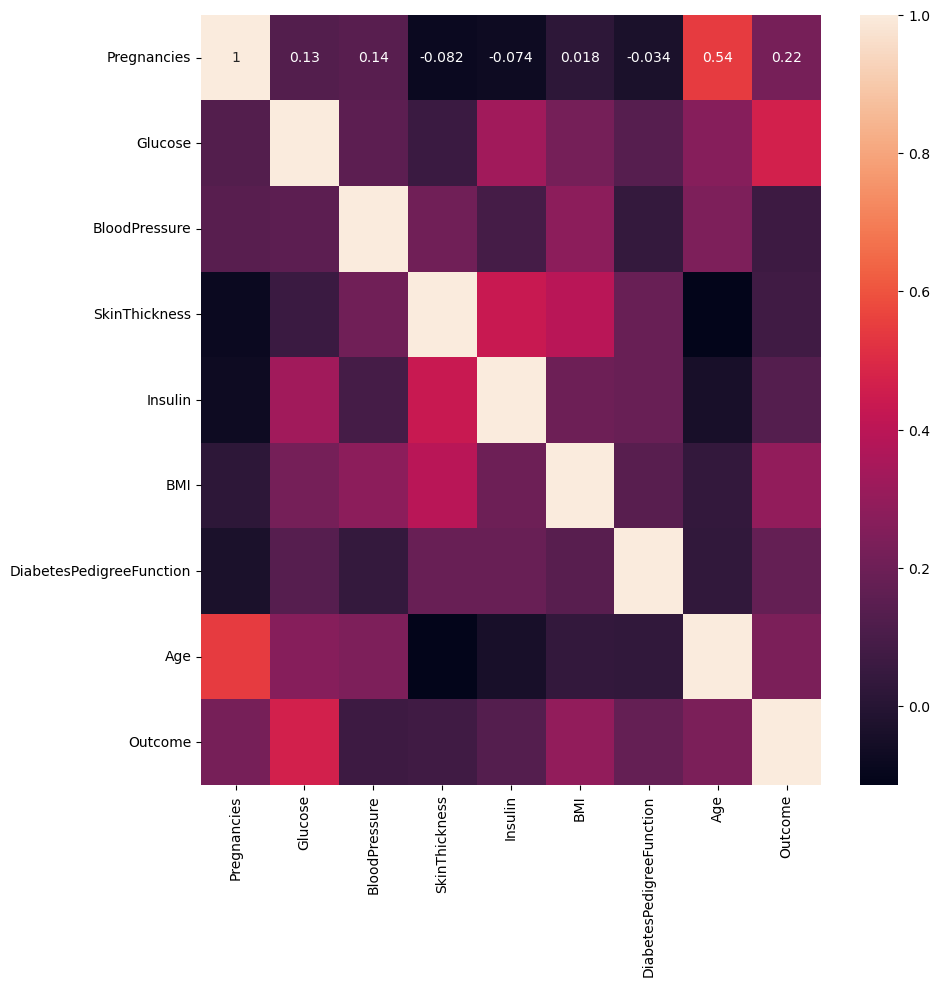

In [10]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(data.corr(),annot=True)
plt.savefig('correaltion-cofficient.jpg')
plt.show()

##### Descriptive stastitics

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Data imputation

C:\Users\asnan\AppData\Local\Temp\ipykernel_26168\2579134276.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Pregnancies)
C:\Users\asnan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Pregnancies', ylabel='Density'>

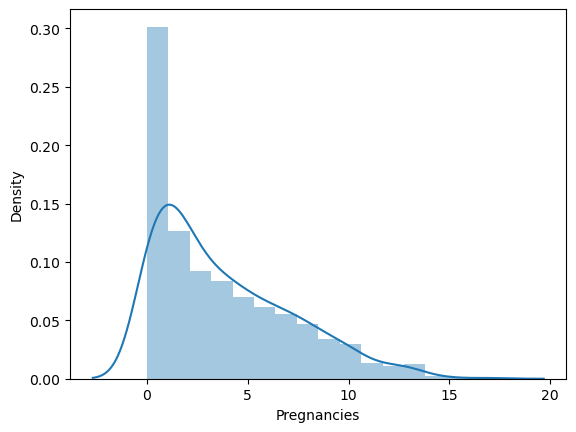

In [12]:
# Pregnancies->Median
sns.distplot(data.Pregnancies)

C:\Users\asnan\AppData\Local\Temp\ipykernel_26168\2768057301.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Glucose)
C:\Users\asnan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Glucose', ylabel='Density'>

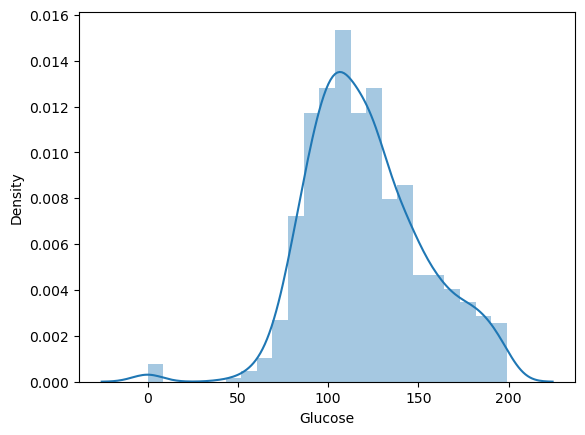

In [13]:
#Glucose->Mean
sns.distplot(data.Glucose)

C:\Users\asnan\AppData\Local\Temp\ipykernel_26168\840647196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.BloodPressure)
C:\Users\asnan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BloodPressure', ylabel='Density'>

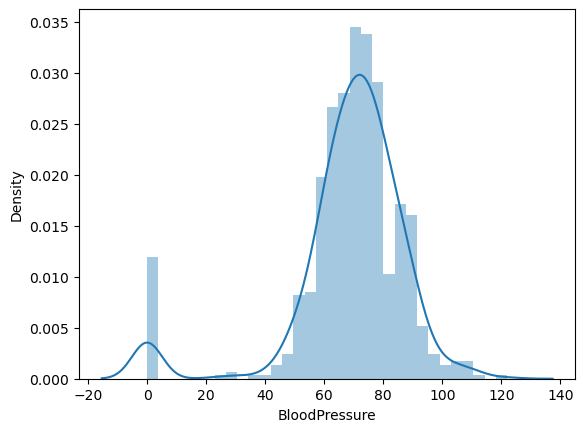

In [14]:
#BloodPressure->Mean
sns.distplot(data.BloodPressure)

C:\Users\asnan\AppData\Local\Temp\ipykernel_26168\2197707123.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.SkinThickness)
C:\Users\asnan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SkinThickness', ylabel='Density'>

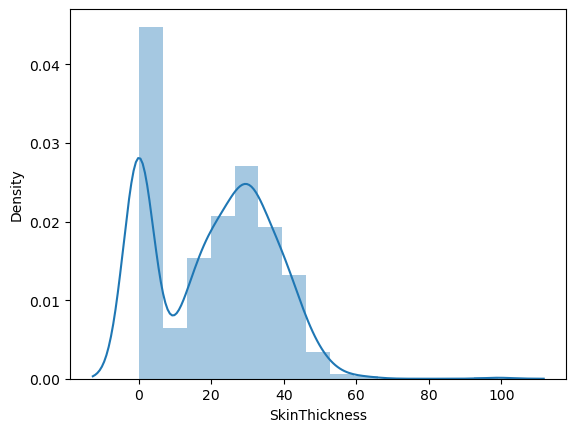

In [15]:
#SkinThickness->Median
sns.distplot(data.SkinThickness)

C:\Users\asnan\AppData\Local\Temp\ipykernel_26168\1532356153.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Insulin)
C:\Users\asnan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Insulin', ylabel='Density'>

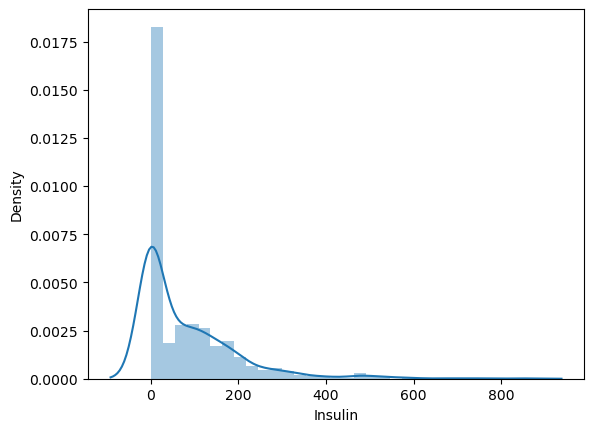

In [16]:
#Insulin->Meadian
sns.distplot(data.Insulin)

C:\Users\asnan\AppData\Local\Temp\ipykernel_26168\3702187317.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.BMI)
C:\Users\asnan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BMI', ylabel='Density'>

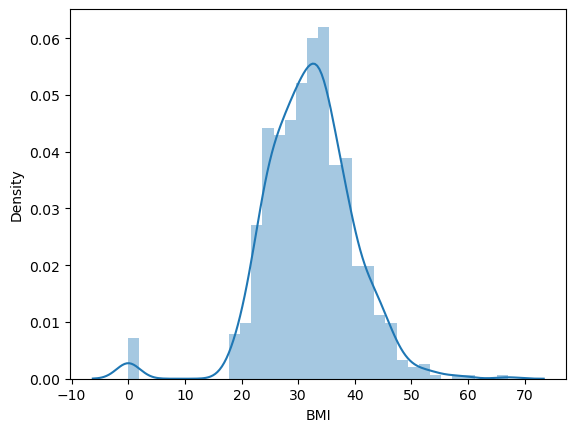

In [17]:
#BMI->Mean
sns.distplot(data.BMI)

C:\Users\asnan\AppData\Local\Temp\ipykernel_26168\3678914332.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.DiabetesPedigreeFunction)
C:\Users\asnan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

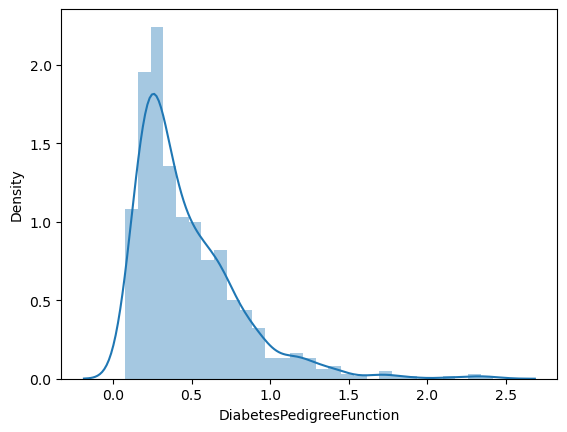

In [18]:
#DiabetiesPedigeeFunction->Median
sns.distplot(data.DiabetesPedigreeFunction)

C:\Users\asnan\AppData\Local\Temp\ipykernel_26168\1898824341.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age)
C:\Users\asnan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

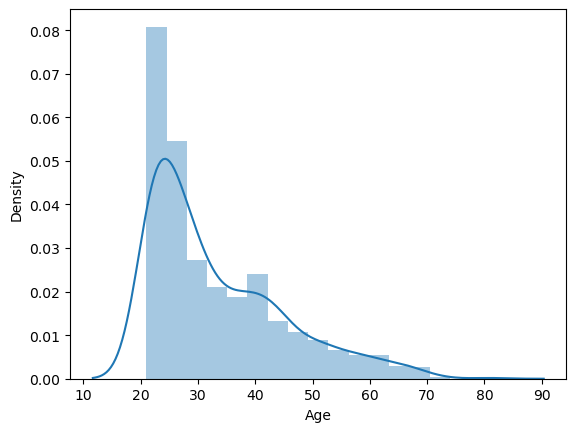

In [19]:
#Age->Median
sns.distplot(data.Age)

In [20]:
data['Pregnancies']=data['Pregnancies'].replace(0,data['Pregnancies'].median())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].replace(0,data['DiabetesPedigreeFunction'].median())
data['Age']=data['Age'].replace(0,data['Age'].median())

In [21]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.600000,0.627,50,1
1,1,85.0,66.000000,29,30.5,26.600000,0.351,31,0
2,8,183.0,64.000000,23,30.5,23.300000,0.672,32,1
3,1,89.0,66.000000,23,94.0,28.100000,0.167,21,0
4,3,137.0,40.000000,35,168.0,43.100000,2.288,33,1
5,5,116.0,74.000000,23,30.5,25.600000,0.201,30,0
6,3,78.0,50.000000,32,88.0,31.000000,0.248,26,1
7,10,115.0,69.105469,23,30.5,35.300000,0.134,29,0
8,2,197.0,70.000000,45,543.0,30.500000,0.158,53,1
9,8,125.0,96.000000,23,30.5,31.992578,0.232,54,1


#### Outlier Detection

In [22]:
## x->Input features and Y-> Target value
x=data.drop(columns='Outcome',axis=1)
y=data['Outcome']

### Outlier Detection->Box Plot

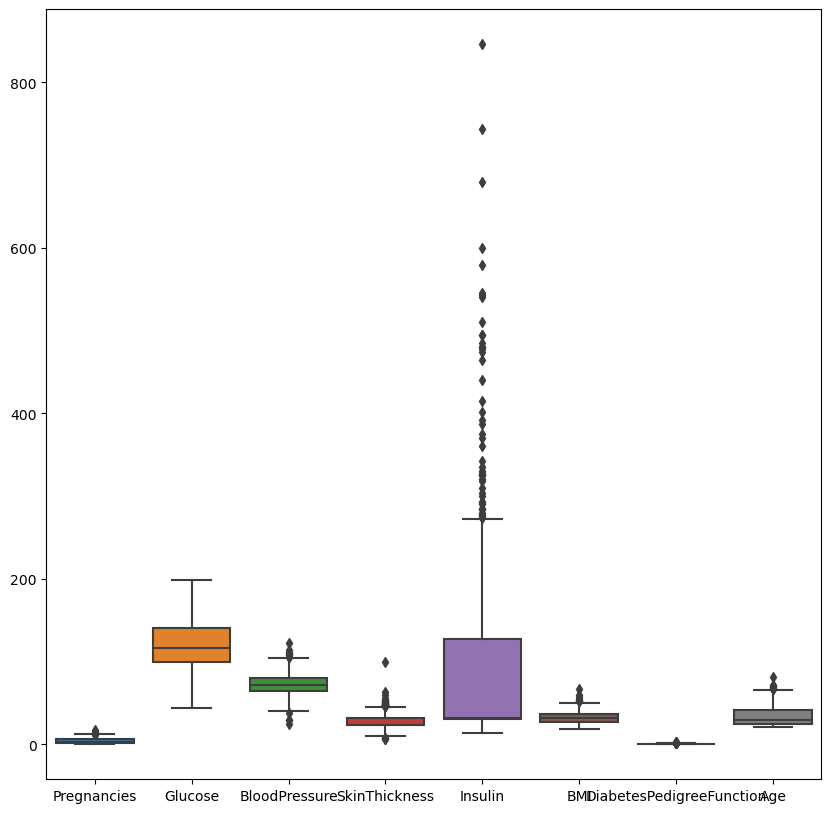

In [23]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x,ax=ax)
plt.savefig('boxplot.jpg')

In [24]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in cols:
    Q1=x[col].quantile(0.25)
    Q3=x[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    mask=(x[col]>=lower_bound) & (x[col]<=upper_bound)

In [25]:
x_outlier_detection=x[mask]
y_outlier_detection=y[mask]

In [26]:
x_outlier_detection.shape

(759, 8)

In [27]:
y_outlier_detection.shape

(759,)

#### Standardization

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_outlier_detection)

In [29]:
x_scaled

array([[ 0.57322173,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-1.0797999 , -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23443039,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.2426174 , -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-1.0797999 ,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-1.0797999 , -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

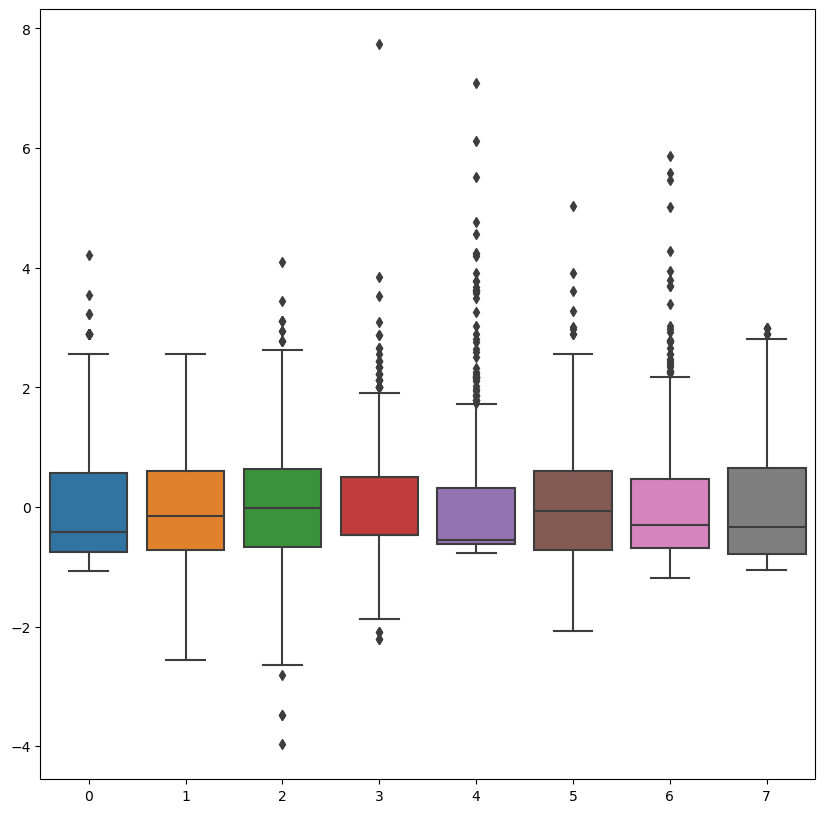

In [30]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x_scaled,ax=ax)
plt.savefig('boxplot.jpg')

In [31]:
y_outlier_detection.value_counts()

Outcome
0    493
1    266
Name: count, dtype: int64

In [32]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [33]:
type(x_scaled)

numpy.ndarray

In [34]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [35]:
x_scaled=pd.DataFrame(x_scaled,columns=cols)
x_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,-3.978665e-17,-3.042508e-17,-1.509552e-16,-4.329724e-17,5.546727e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.558042e+00,-3.968588e+00,-2.200901e+00,-7.684941e-01,-2.081038e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.286101e-01,-6.755847e-01,-4.729631e-01,-6.126688e-01,-7.125819e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.517621e-01,-1.698412e-02,-4.729631e-01,-5.607270e-01,-7.202795e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.063810e-01,6.416165e-01,4.990017e-01,3.222827e-01,5.976421e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551183e+00,4.099270e+00,7.734740e+00,7.088876e+00,5.037846e+00,5.864467e+00,2.988962e+00


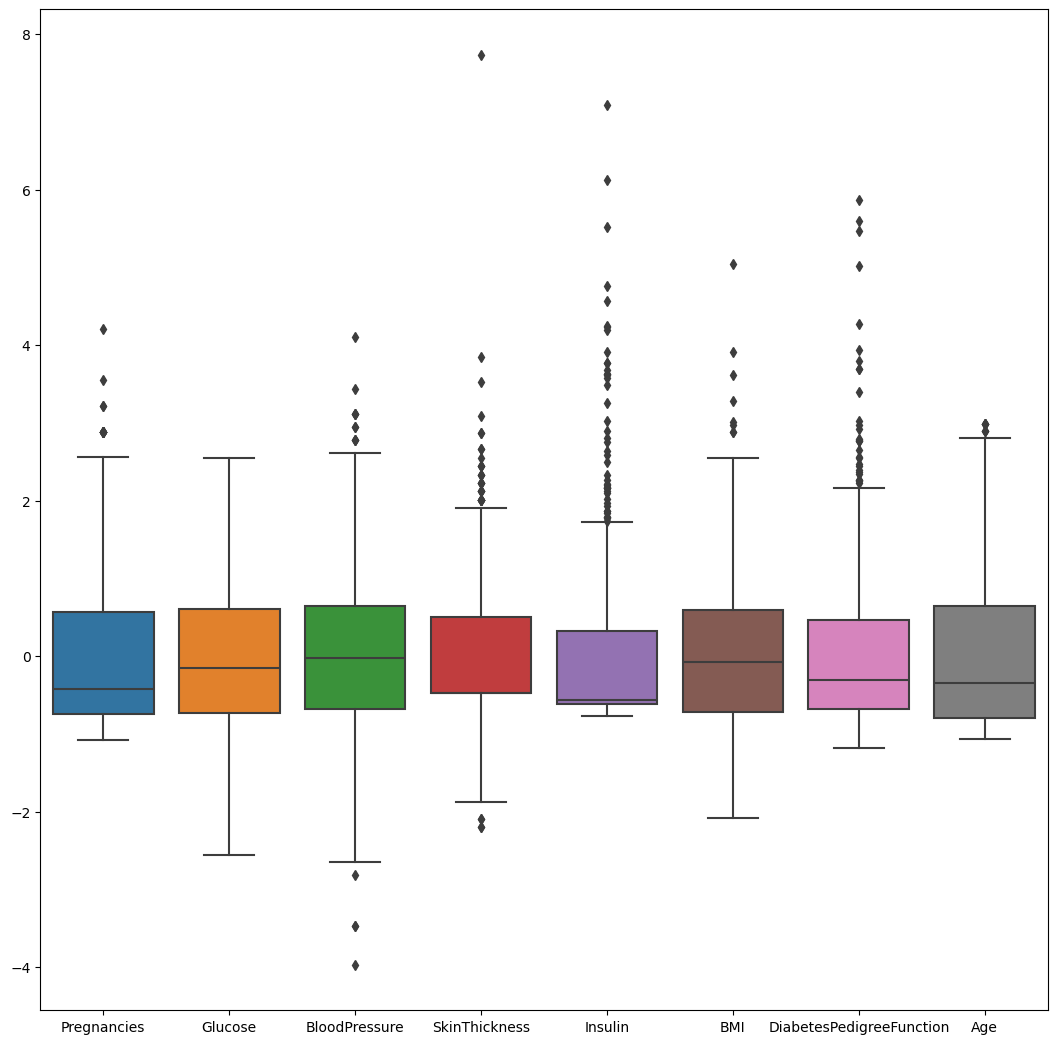

In [36]:
fig,ax=plt.subplots(figsize=(13,13))
sns.boxplot(data=x_scaled,ax=ax)
plt.savefig('boxplot.jpg')

In [37]:
data.shape

(768, 9)

In [38]:
x_scaled.shape

(759, 8)

In [39]:
x_scaled.reset_index(drop=True,inplace=True)
y_outlier_detection.reset_index(drop=True,inplace=True)

In [40]:
q=x_scaled['Insulin'].quantile(.95)
mask=x_scaled['Insulin']<q
dataNew=x_scaled[mask]
y_outlier_detection=y_outlier_detection[mask]

In [41]:
dataNew.shape

(721, 8)

In [42]:
y_outlier_detection.shape

(721,)

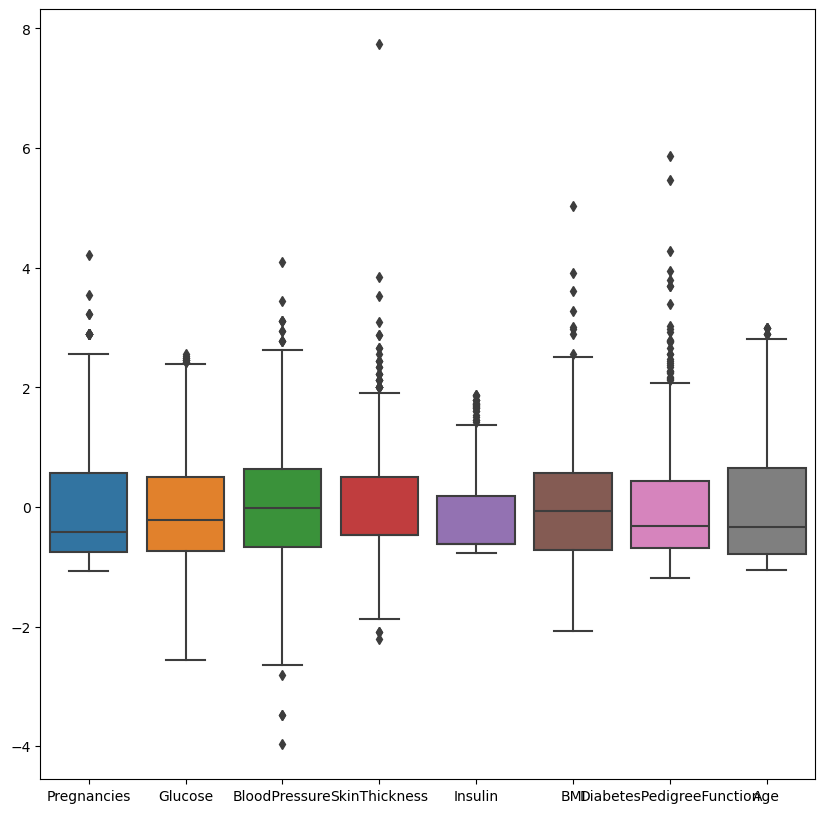

In [43]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=dataNew,ax=ax)
plt.savefig('boxplot.jpg')

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataNew,y_outlier_detection,test_size=0.33,random_state=42)

In [45]:
x_train.shape

(483, 8)

In [46]:
x_test.shape

(238, 8)

In [47]:
y_train.value_counts()

Outcome
0    318
1    165
Name: count, dtype: int64

### SMOTE Technique

In [48]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)

In [49]:
#Check resample class distribution
print('\nResampled Class Distribution')
print(pd.Series(y_train_resampled).value_counts())


Resampled Class Distribution
Outcome
0    318
1    318
Name: count, dtype: int64


#### Model Training

In [50]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()
classification.fit(x_train_resampled,y_train_resampled)

LogisticRegression()

#### Model Evaluation

In [51]:
y_predictions=classification.predict(x_test)
print(y_predictions)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predictions)

0.7478991596638656

In [53]:
from sklearn.metrics import classification_report
target_names=["Non-Diabetic","Diabetic"]
print(classification_report(y_test,y_predictions,target_names=target_names))  

              precision    recall  f1-score   support

Non-Diabetic       0.85      0.76      0.80       159
    Diabetic       0.60      0.72      0.66        79

    accuracy                           0.75       238
   macro avg       0.72      0.74      0.73       238
weighted avg       0.76      0.75      0.75       238



In [54]:
import pickle
pickle.dump(classification,open("classification_model.pkl","wb"))

In [57]:
classification_model=pickle.load(open("classification_model.pkl",'rb'))
classification_model.predict(x_test)

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)